In [2]:
%pip install numpy pandas seaborn matplotlib kagglehub xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Visualizing and analysing the data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import kagglehub
import os

# Download and get paths for each dataset
rainfall_path = kagglehub.dataset_download("arbethi/rainfall-dataset")
kerala_path = kagglehub.dataset_download("mukulthakur177/kerela-flood")

# List files in each dataset
print("Rainfall Dataset Files:", os.listdir(rainfall_path))
print("Kerala Flood Files:", os.listdir(kerala_path))

c:\Users\justi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Rainfall Dataset Files: ['flood dataset.xlsx', 'rainfall in india 1901-2015.xlsx']
Kerala Flood Files: ['kerala.csv']


In [6]:
df1=pd.read_excel(os.path.join(rainfall_path, "flood dataset.xlsx"))
df2=pd.read_csv(os.path.join(kerala_path, "kerala.csv"))

In [7]:
df1.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [8]:
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [9]:
df1.columns = df1.columns.str.strip()  # ← remove leading/trailing spaces
df2.columns = df2.columns.str.strip() 

In [10]:
df1_clean = df1[['ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'avgjune','flood',]].copy()
df1_clean.rename(columns={
    'ANNUAL': 'annual',
    'Jan-Feb': 'jan_feb',
    'Mar-May': 'mar_may',
    'Jun-Sep': 'jun_sep',
    'Oct-Dec': 'oct_dec',
    'avgjune':'jun_avg',
    'flood': 'flood'
}, inplace=True)


df2_clean = df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS']].copy()

# Create seasonal groupings
df2_clean['jan_feb'] = df2_clean['JAN'] + df2_clean['FEB']
df2_clean['mar_may'] = df2_clean['MAR'] + df2_clean['APR'] + df2_clean['MAY']
df2_clean['jun_sep'] = df2_clean['JUN'] + df2_clean['JUL'] + df2_clean['AUG'] + df2_clean['SEP']
df2_clean['oct_dec'] = df2_clean['OCT'] + df2_clean['NOV'] + df2_clean['DEC']
df2_clean['jun_avg'] = df2_clean['JUN']

df2_clean = df2_clean[['ANNUAL RAINFALL', 'jan_feb', 'mar_may', 'jun_sep', 'oct_dec', 'jun_avg','FLOODS']]
df2_clean.rename(columns={
    'ANNUAL RAINFALL': 'annual',
    'FLOODS': 'flood'
}, inplace=True)
df2_clean['flood'] = df2_clean['flood'].map({'YES': 1, 'NO': 0})  # Convert text to binary

In [11]:
flood = pd.concat([df1_clean,  df2_clean], ignore_index=True)

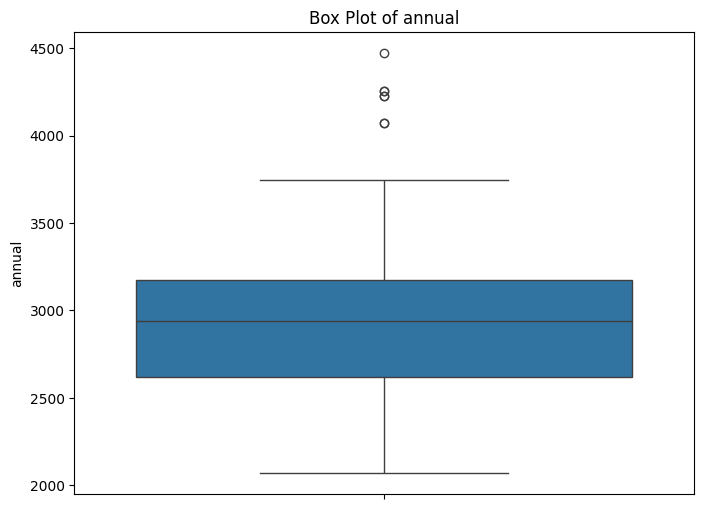

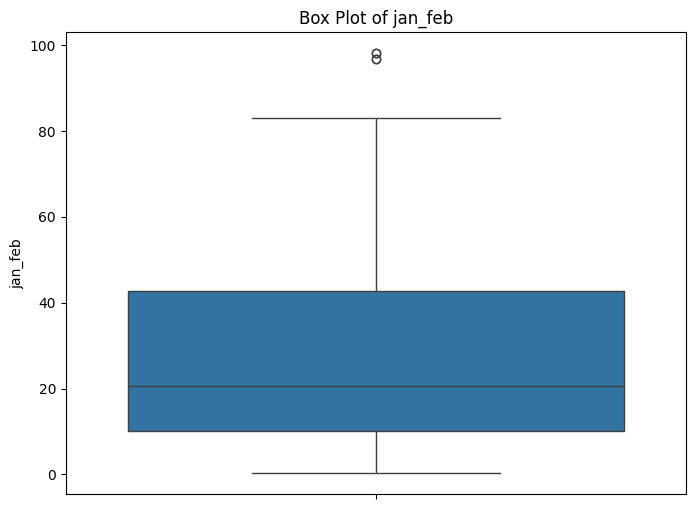

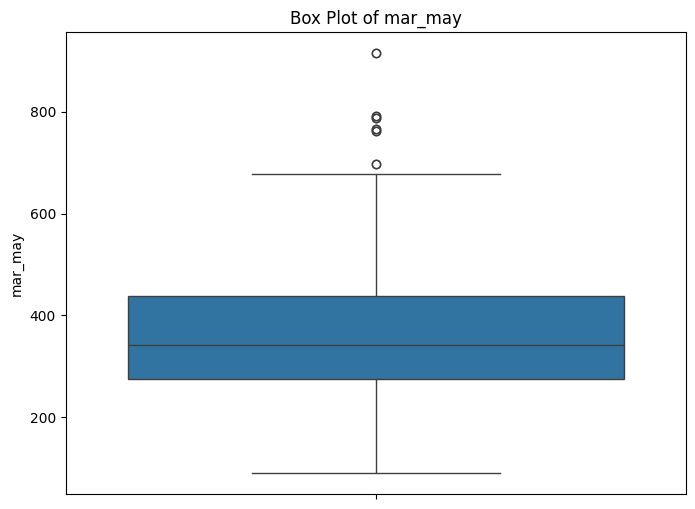

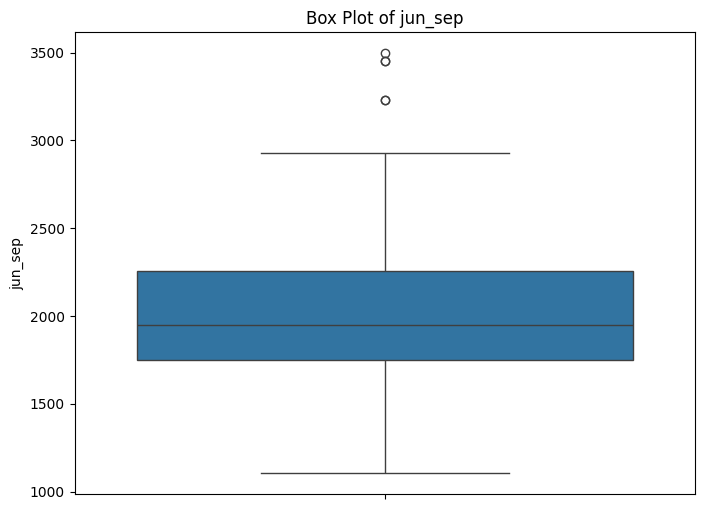

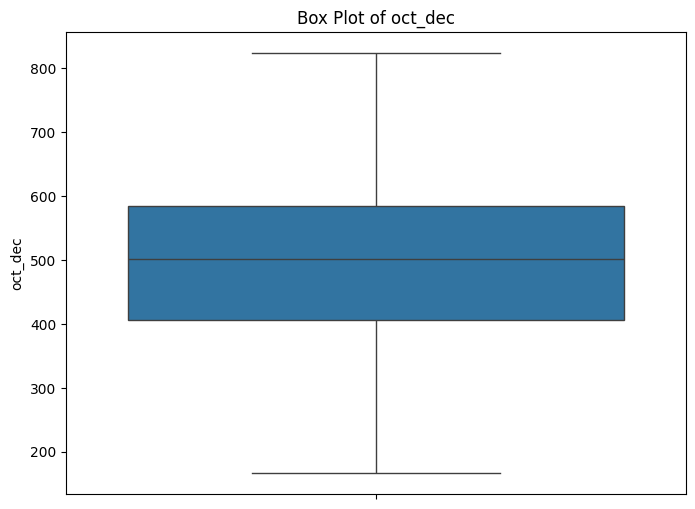

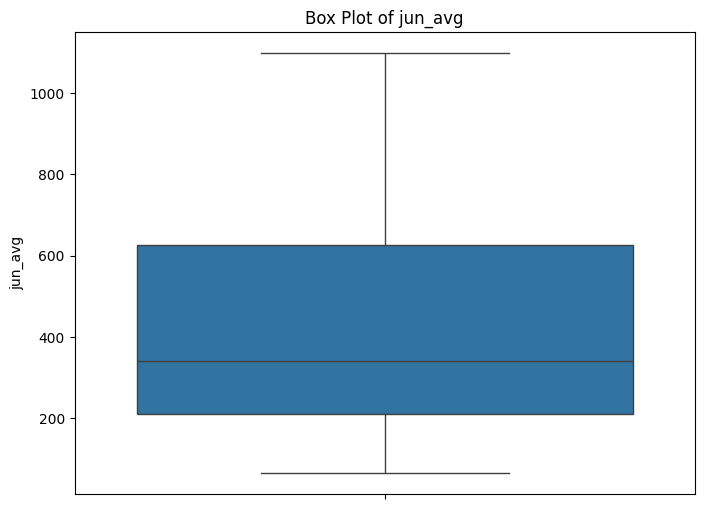

In [12]:
#Univariate Analysis
numerical_cols = ['annual', 'jan_feb', 'mar_may', 'jun_sep', 'oct_dec','jun_avg']
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=flood, y=col)
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

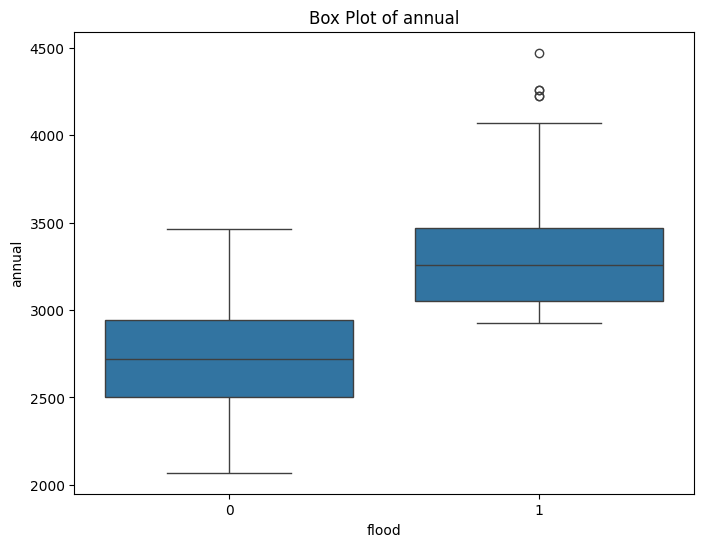

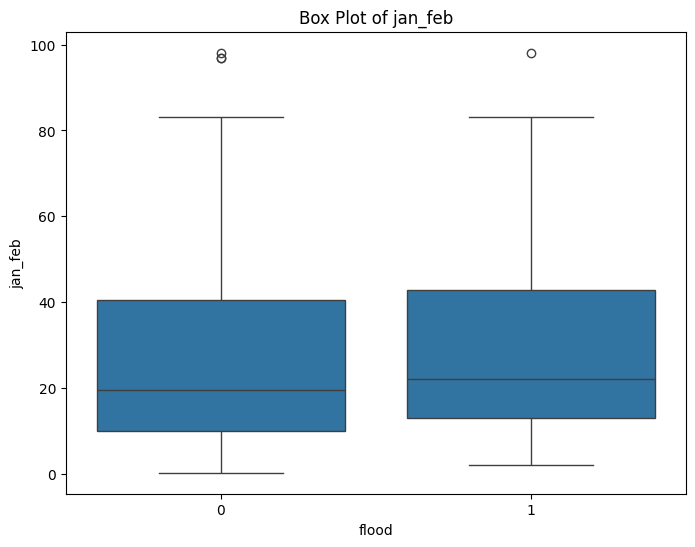

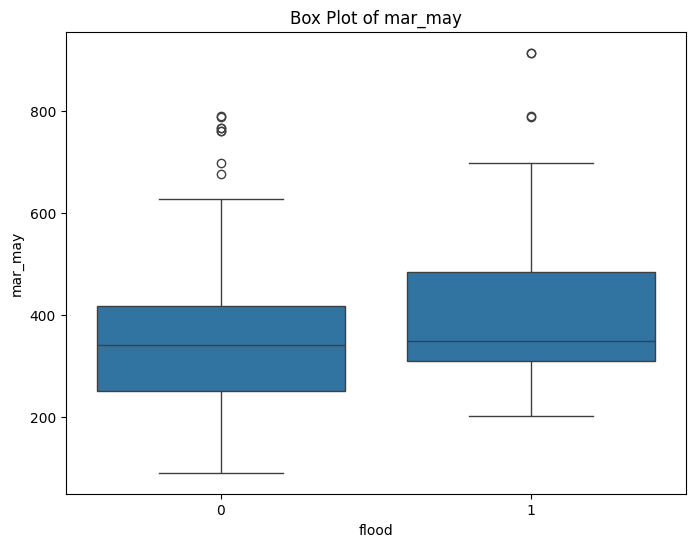

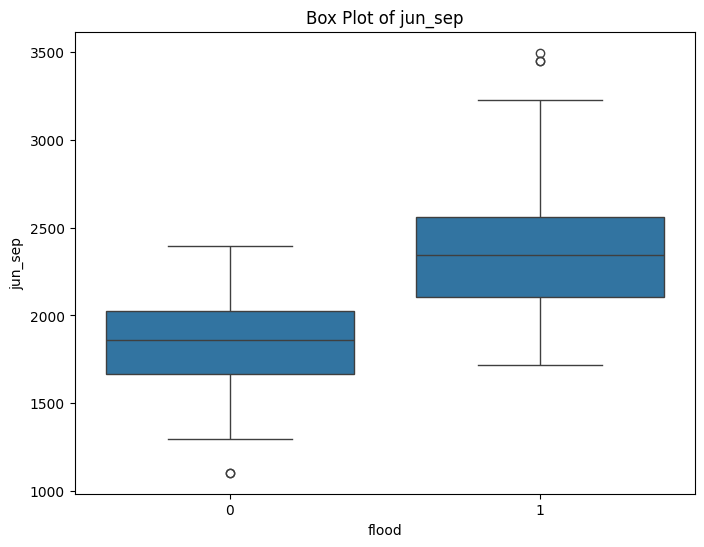

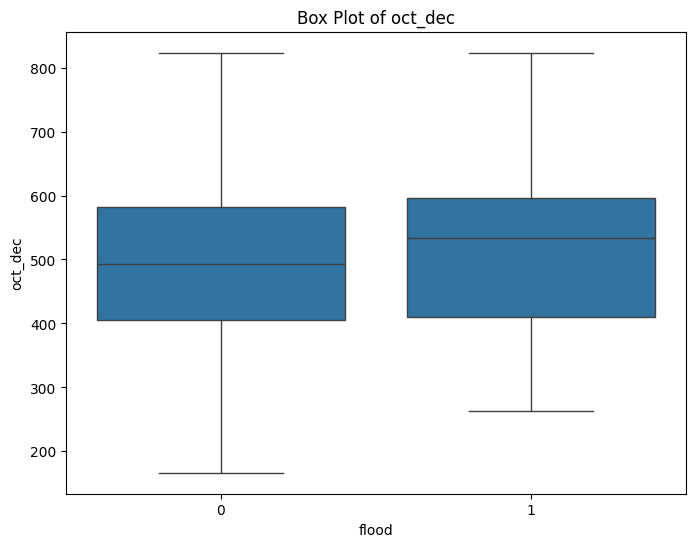

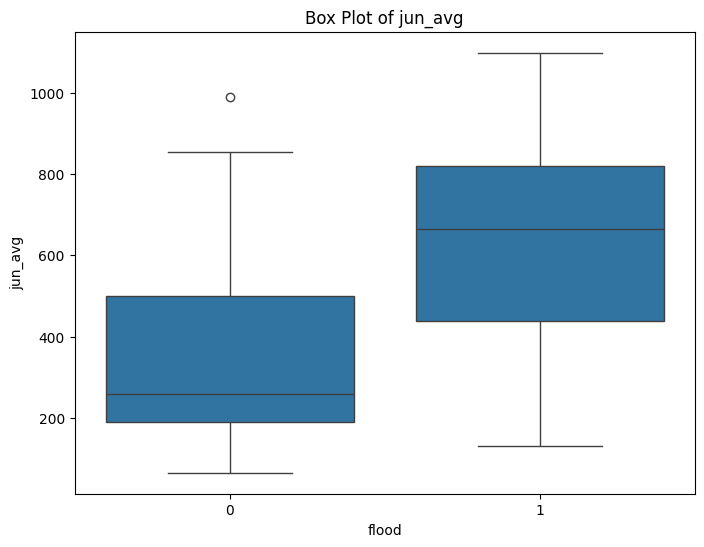

In [13]:
numerical_cols = ['annual', 'jan_feb', 'mar_may', 'jun_sep', 'oct_dec','jun_avg']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=flood, y=col, x='flood')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

<Axes: >

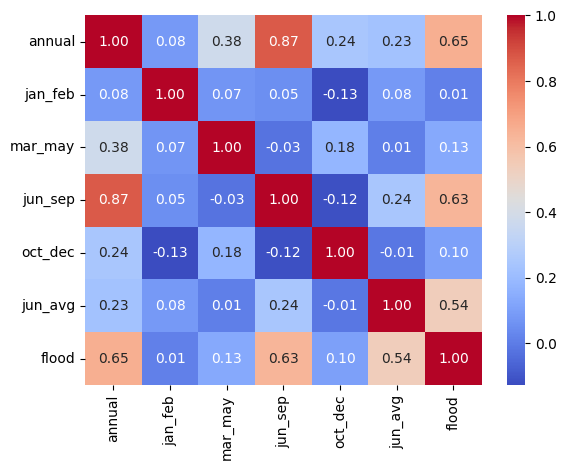

In [14]:
#Multivariate Analysis
sns.heatmap(flood.corr(),annot=True, cmap='coolwarm',fmt='0.2f')

<Figure size 800x1000 with 0 Axes>

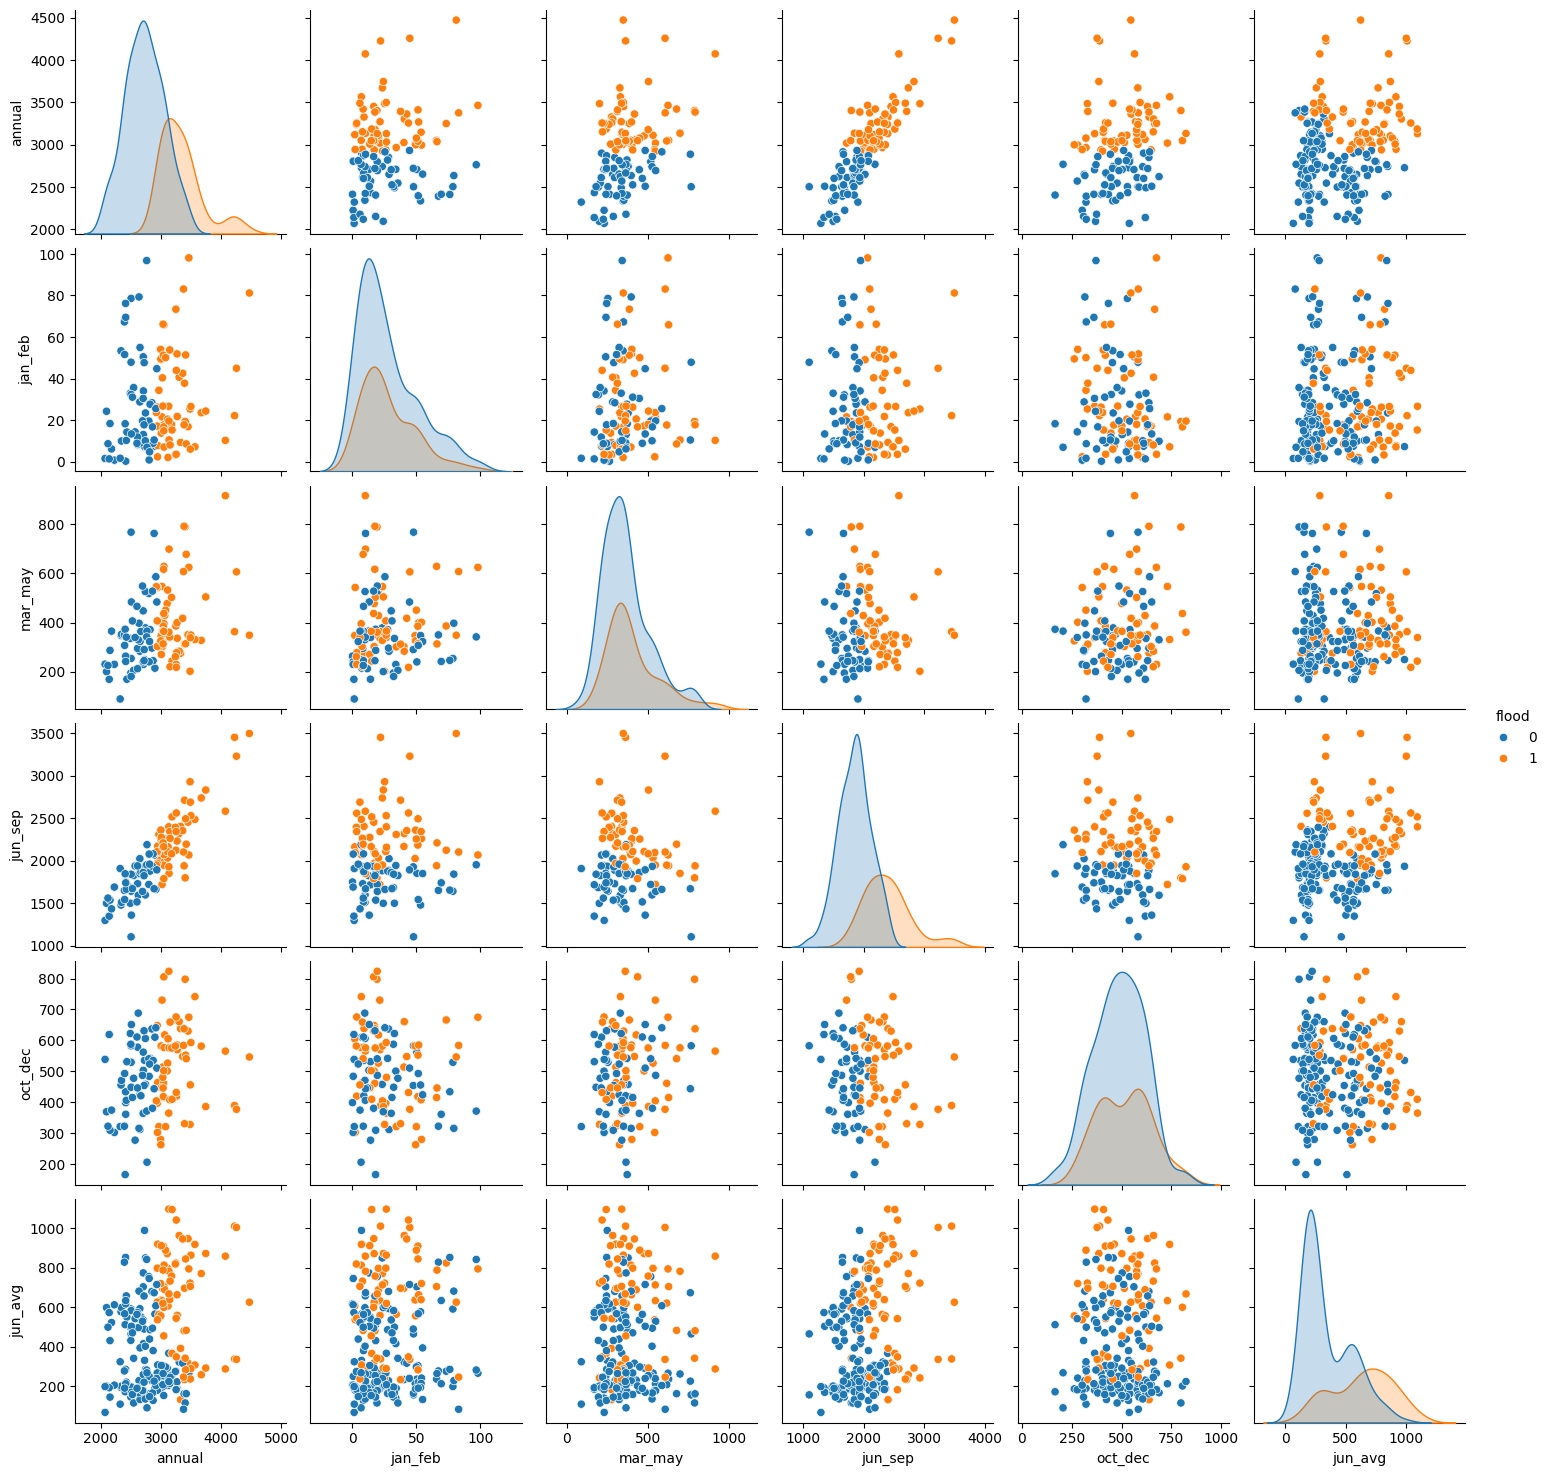

In [15]:
figure=plt.figure(figsize=(8, 10))
sns.pairplot(flood, hue='flood')

In [16]:
#Descriptive Analysis

In [17]:
flood.head()

,annual,jan_feb,mar_may,jun_sep,oct_dec,jun_avg,flood
0,3248.6,73.4,386.2,2122.8,666.1,274.866667,0
1,3326.6,9.3,275.7,2403.4,638.2,130.300000,1
2,3271.2,21.7,336.3,2343.0,570.1,186.200000,0
3,3129.7,26.7,339.4,2398.2,365.3,366.066667,0
4,2741.6,23.4,378.5,1881.5,458.1,283.400000,0


In [18]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   annual   233 non-null    float64
 1   jan_feb  233 non-null    float64
 2   mar_may  233 non-null    float64
 3   jun_sep  233 non-null    float64
 4   oct_dec  233 non-null    float64
 5   jun_avg  233 non-null    float64
 6   flood    233 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 12.9 KB


In [19]:
flood.describe()

,annual,jan_feb,mar_may,jun_sep,oct_dec,jun_avg,flood
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2925.445923,27.796567,376.439485,2024.651073,496.568670,437.650215,0.326180
std,436.649971,22.521476,150.121199,397.995831,129.530822,258.035780,0.469823
min,2068.800000,0.300000,89.900000,1104.200000,166.600000,65.600000,0.000000
25%,2621.700000,10.100000,275.700000,1749.200000,406.500000,211.033333,0.000000
50%,2937.500000,20.500000,342.000000,1948.700000,501.500000,340.500000,0.000000
75%,3176.700000,42.600000,437.000000,2254.600000,584.000000,625.800000,1.000000
max,4473.000000,98.100000,915.200000,3496.400000,823.300000,1098.200000,1.000000


In [20]:
flood['flood'].value_counts()

flood
0    157
1     76
Name: count, dtype: int64

In [21]:
#Data preprocessing

In [22]:
flood.isnull().any()

annual     False
jan_feb    False
mar_may    False
jun_sep    False
oct_dec    False
jun_avg    False
flood      False
dtype: bool

In [23]:
flood.isnull().sum()

annual     0
jan_feb    0
mar_may    0
jun_sep    0
oct_dec    0
jun_avg    0
flood      0
dtype: int64

In [24]:
X = flood[['jun_sep','mar_may','oct_dec','jun_avg' ,'annual']]
y = flood['flood']

In [25]:
X

,jun_sep,mar_may,oct_dec,jun_avg,annual
0,2122.8,386.2,666.1,274.866667,3248.6
1,2403.4,275.7,638.2,130.300000,3326.6
2,2343.0,336.3,570.1,186.200000,3271.2
3,2398.2,339.4,365.3,366.066667,3129.7
4,1881.5,378.5,458.1,283.400000,2741.6
...,...,...,...,...,...
228,2164.9,364.6,502.2,454.400000,3046.4
229,1514.7,466.0,611.1,563.600000,2600.6
230,1433.2,365.3,374.9,522.200000,2176.6
231,1559.4,226.0,323.0,498.500000,2117.1


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
# Model Building

In [29]:
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import metrics
import xgboost

In [30]:
dtree = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestClassifier()
knn = neighbors.KNeighborsClassifier()
xgb = xgboost.XGBClassifier()

In [31]:
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)
knn.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
p1 = dtree.predict(x_test)
p2 = rf.predict(x_test)
p3 = knn.predict(x_test)
p4 = xgb.predict(x_test)


In [33]:
# Model Comparison and Evaluation

In [34]:
#Decision Tree
print("ConfusionMatrix:\n",metrics.confusion_matrix(y_test, p1))
print("Accuracy  :",metrics.accuracy_score(y_test, p1))
print("Precision :",metrics.precision_score(y_test, p1))
print("Recall    :",metrics.recall_score(y_test, p1))

ConfusionMatrix:
 [[46  0]
 [ 2 22]]
Accuracy  : 0.9714285714285714
Precision : 1.0
Recall    : 0.9166666666666666


In [35]:
#Random Forest
print("ConfusionMatrix:\n",metrics.confusion_matrix(y_test, p2))
print("Accuracy  :",metrics.accuracy_score(y_test, p2))
print("Precision :",metrics.precision_score(y_test, p2))
print("Recall    :",metrics.recall_score(y_test, p2))

ConfusionMatrix:
 [[45  1]
 [ 2 22]]
Accuracy  : 0.9571428571428572
Precision : 0.9565217391304348
Recall    : 0.9166666666666666


In [36]:
#KNN
print("ConfusionMatrix:\n",metrics.confusion_matrix(y_test, p3))
print("Accuracy  :",metrics.accuracy_score(y_test, p3))
print("Precision :",metrics.precision_score(y_test, p3))
print("Recall    :",metrics.recall_score(y_test, p3))

ConfusionMatrix:
 [[44  2]
 [ 4 20]]
Accuracy  : 0.9142857142857143
Precision : 0.9090909090909091
Recall    : 0.8333333333333334


In [37]:
#XGBoost
print("ConfusionMatrix:\n",metrics.confusion_matrix(y_test, p4))
print("Accuracy  :",metrics.accuracy_score(y_test, p4))
print("Precision :",metrics.precision_score(y_test, p4))
print("Recall    :",metrics.recall_score(y_test, p4))

ConfusionMatrix:
 [[46  0]
 [ 2 22]]
Accuracy  : 0.9714285714285714
Precision : 1.0
Recall    : 0.9166666666666666


In [38]:
#Saving the Model
from joblib import dump

# StandardScaler
dump(sc, "transform.save") 

#trained XGBoost model
dump(xgb, "flood.save")  

#list of input column names used during training
input_columns = ['jun_sep','mar_may','oct_dec','jun_avg' ,'annual']  
dump(input_columns, "columns.save")

['columns.save']